In [ ]:
# Tugas Kecil 2: Eksplorasi scikit-learn pada Jupyter Notebook
## IF3170 Inteligensi Buatan
## Anggota Kelompok:
## 13515002 - Wenny Yustalim (K-02)
## 13515004 - Jordhy Fernando (K-01)

# Membaca Dataset Standar iris dan Dataset play-tennis
## Membaca Dataset iris

In [14]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()

# Dataset dicetak sebagai pembuktian (menggunakan library pandas agar tampilan lebih rapi)
print(pd.DataFrame(data= np.c_[iris.data, iris.target],
                     columns= iris.feature_names + ['target']))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
5                  5.4               3.9                1.7               0.4   
6                  4.6               3.4                1.4               0.3   
7                  5.0               3.4                1.5               0.2   
8                  4.4               2.9                1.4               0.2   
9                  4.9               3.1                1.5               0.1   
10                 5.4               3.7                1.5               0.2   
11                 4.8      

## Membaca Dataset play-tennis

In [10]:
play_tennis = pd.read_csv("play-tennis.csv")
# Dataset dicetak sebagai pembuktian
print ("Dataset Play Tennis")
print(play_tennis)

Dataset Play Tennis
     outlook temperature humidity   wind playtennis
0      sunny         hot     high  False         no
1      sunny         hot     high   True         no
2   overcast         hot     high  False        yes
3       rain        mild     high  False        yes
4       rain        cool   normal  False        yes
5       rain        cool   normal   True         no
6   overcast        cool   normal   True        yes
7      sunny        mild     high  False         no
8      sunny        cool   normal  False        yes
9       rain        mild   normal  False        yes
10     sunny        mild   normal   True        yes
11  overcast        mild     high   True        yes
12  overcast         hot   normal  False        yes
13      rain        mild     high   True         no


# Pembelajaran Dataset iris dengan Skema Full Training
## Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

clfNB = GaussianNB()
clfNB.fit(iris.data, iris.target)

# Menampilkan model
# Pada Gaussian Naive Bayes model yang digunakan adalah probablitas setiap kelas serta 
# rata-rata dan variansi setiap fitur per kelas
print("Model:")
print("Probability of each class")
print(clfNB.class_prior_)
print()
print("Mean of each feature per class")
print(clfNB.theta_)
print()
print("Variance of each feature per class")
print(clfNB.sigma_)

Model:
Probability of each class
[ 0.33333333  0.33333333  0.33333333]

Mean of each feature per class
[[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]
 [ 6.588  2.974  5.552  2.026]]

Variance of each feature per class
[[ 0.121764  0.142276  0.029504  0.011264]
 [ 0.261104  0.0965    0.2164    0.038324]
 [ 0.396256  0.101924  0.298496  0.073924]]



## Decision Tree ID3

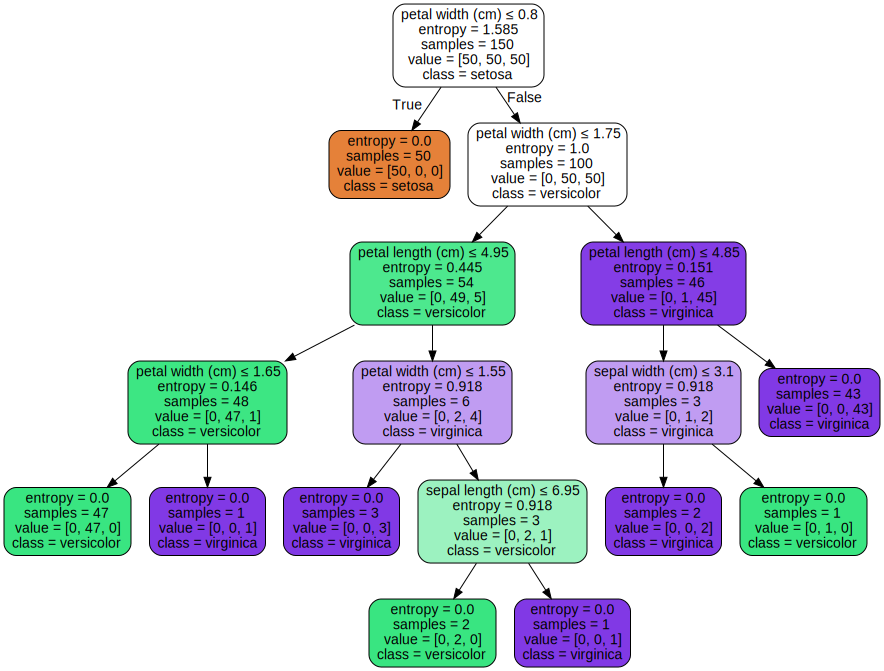

In [4]:
from sklearn import tree
import graphviz

clfDT = tree.DecisionTreeClassifier(criterion="entropy")
clfDT = clfDT.fit(iris.data, iris.target)

# Menampilkan model
dot_data = tree.export_graphviz(clfDT, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## k-Nearest Neighbors

In [24]:
from sklearn import neighbors

k = 15
clfkNN = neighbors.KNeighborsClassifier(k, weights='uniform')
clfkNN.fit(iris.data, iris.target)

[array([[-0.13550239,  0.3597881 , -0.81630916, -0.3227893 , -0.57684476],
        [-0.66570776, -0.51233452, -0.25219808, -0.16857787,  0.06338741],
        [-0.1319547 ,  0.30246194, -0.48262707,  0.6174627 , -0.77177221],
        [ 0.27837206, -0.13504058,  0.09584001, -0.5872452 , -0.49299781]]),
 array([[ 0.73066898, -0.76834821],
        [-0.85350401, -0.61135478],
        [ 0.7001833 , -0.74371656],
        [-0.14608018,  0.84784599],
        [ 0.06141013,  0.35528709]]),
 array([[ 0.73312753, -1.05537667,  0.5480383 ],
        [ 1.07104013,  0.54370328, -0.48102273]])]

## Neural Network MLP (Multi Layer Perceptron)

In [ ]:
from sklearn.neural_network import MLPClassifier

clfANN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clfANN = clfANN.fit(iris.data, iris.target)
clfANN.coefs_

In [25]:
# 2c. Melakukan pembelajaran NaïveBayes, DecisionTree, kNN, dan MLP untuk dataset iris dengan skema split train 90% dan test 10%, dan menampilkan kinerja serta confusion matrixnya.

#Bagi jadi 2 data (split 90%, 10%)
import numpy as np
from sklearn import cross_validation
partTest = 0.1
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(
    X, Y, test_size=partTest, random_state=0)
print ("Banyaknya train data: "+str(len(X_train)))
print ("Banyaknya validasi data: "+str(len(X_test)))

## NaiveBayes


#Decision Tree
from sklearn import metrics
#Bangun model
clfSplitDT = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfSplitDT.fit(X_train, Y_train)

#Hitung YPrediksi
Y_pred = clfSplitDT.predict(X_test)

#Hitung akurasi
akurasiSplitDT = metrics.accuracy_score(Y_test,Y_pred)*100
print ("Akurasi "+str(akurasiSplitDT)+"%")

#Confussion Matriks
cnf_matrix_SplitDT = metrics.confusion_matrix(Y_test, Y_pred)
print ("Confussion Matrix")
print (cnf_matrix_SplitDT)


## kNN

#MLP
clfSplitANN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,11), random_state=1) #11 hidden layer@5 units
clfSplitANN = clfSplitANN.fit(X_train, Y_train)

#Hitung YPrediksi
Y_pred = clfSplitANN.predict(X_test)

#Hitung akurasi
akurasiSplitANN = metrics.accuracy_score(Y_test,Y_pred)*100
print ("Akurasi "+str(akurasiSplitANN)+"%")

#Confussion Matriks
cnf_matrix_SplitANN = metrics.confusion_matrix(Y_test, Y_pred)
#print ("Confussion Matrix")
print (cnf_matrix_SplitANN)

F:\Ananconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


NameError: name 'Y' is not defined

In [4]:
# 2d. Melakukan pembelajaran NaïveBayes, DecisionTree, kNN, dan MLP untuk dataset iris dengan skema 10-fold cross validation, dan menampilkan kinerjanya.
# 2d
# 10-Fold Cross Validation using full data training model

from sklearn.model_selection import cross_val_score

## decision tree
score = cross_val_score(clfDT, X, Y, cv=10)
print ("10-Fold CV, trainig using all data with Decision Tree")
print ("Score:" + str(score))
print ()

# ANN
score = cross_val_score(clfANN, X, Y, cv=10)
print ("10-Fold CV, trainig using all data with ANN")
print("Score:" + str(score))

# 10-Fold Cross Validation using partial data training

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf.get_n_splits(X)
print (kf)

## with decision tree

clfDTFold = tree.DecisionTreeClassifier(criterion="entropy")

i = 1
for train_index, test_index in kf.split(X):
    #print ("TRAIN: ", train_index, "TEST: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    clfDTFold = clfDTFold.fit(X_train, Y_train)

    #Hitung YPrediksi
    Y_pred = clfDTFold.predict(X_test)

    #Hitung akurasi
    akurasiFoldDT = metrics.accuracy_score(Y_test,Y_pred)*100
    print ("Fold-" + str(i) + ", akurasi "+str(akurasiFoldDT)+"%")
    i+=1
    
# with ANN

clfANNFold = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

i = 1
for train_index, test_index in kf.split(X):
    #print ("TRAIN: ", train_index, "TEST: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    clfANNFold = clfANNFold.fit(X_train, Y_train)

    #Hitung YPrediksi
    Y_pred = clfANNFold.predict(X_test)

    #Hitung akurasi
    akurasiFoldDT = metrics.accuracy_score(Y_test,Y_pred)*100
    print ("Fold-" + str(i) + ", akurasi "+str(akurasiFoldDT)+"%")
    i+=1

In [ ]:
# 2e. Menyimpan (save) model/hipotesis hasil pembelajaran ke sebuah file eksternal.
# 2e
# Saving Model

from sklearn.externals import joblib

joblib.dump(clfDT, 'Iris-DT.model')
joblib.dump(clfANN, 'Iris-ANN.model')

In [6]:
# 2f. Membaca (read) model/hipotesis dari file eksternal.
# 2f
# Load Saved Model

loadedDTModel = joblib.load('Iris-DT.model')

score = cross_val_score(loadedDTModel, X, Y, cv=10)
print ("Score:" + str(score))

In [8]:
# 2g. Membuat instance baru dengan memberi nilai untuk setiap atribut
# 2g
# Create New  Instance

anon_iris_x = [3.1, 1.2, 0.7, 4.0]
anon_iris_x = np.array([anon_iris_x])

print ("New instance attribute: " + str(anon_iris_x))


In [7]:
# 2h. Melakukan klasifikasi dengan memanfaatkan model/hipotesis NaïveBayes, DecisionTree, dan kNN dan instance pada g.

# 2h
# Classify New Instance
print ("Classification using Decision Tree: ")
print (clfDT.predict(anon_iris_x))

print ()
iris_70_copy = [5.9, 3.2, 4.8, 1.8]
iris_70_copy = np.array([iris_70_copy])

print ("Classification using ANN")
print (clfANN.predict(iris_70_copy))
print (clfANN.predict([X[70]]))